Thoughts and notes:

The output will be dark matter relic density, which is best understood on a log scale. Hence we train on log(labels) and take e^(prediction).

Should split data set into about 70% training, 15% validation, and 15% test data.

Weirdness found in EWKino.csv so far:

1) These 9 columns ["mqL1", "muR", "mdR", "meL", "mmuL", "meR", "mmuR", "mtauL", "mtauR"] only contain the value 10,000. This is expected, simply drop them.
2) Both mu.png and M_2.png have identical bands missing from their middle, from about -50 to +50. Why?
3) mA.png has many fewer points close to zero than looks right.
4) At.png looks like it has a less dense patch in the middle right. Is this deliberate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../csv-files/Bino-DM.csv")
input_parameters = ["M_1", "M_2", "mu", "tan_beta", "M_3", "At", "Ab", "Atau", "mA", "mqL3", "mtR", "mbR"]
print(df.shape)

(8897, 244)


/tmp/ipykernel_7598/4291631667.py:5: DtypeWarning: Columns (237,239,240,241) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../csv-files/Bino-DM.csv")


In [2]:
def normalise_columns(df, columns_to_normalise):

    # Create a copy of the DataFrame to avoid modifying the original
    normalised_df = df.copy()
    
    # Normalise specified columns so mean = 0 and std = 1
    for column in columns_to_normalise:
        col_mean = df[column].mean()
        col_std = df[column].std()
        normalised_df[column] = (df[column] - col_mean) / col_std
    
    return normalised_df

In [3]:
normalised_df = normalise_columns(df, input_parameters)

In [ ]:
shuffled = normalised_df.sample(frac=1)
shuffled = shuffled.reset_index(drop=True) # remove previous indices
test = shuffled.loc[:1334]
train = shuffled.loc[1335:]
print(test.shape)
print(train.shape)
#test.to_csv("../csv-files/Bino-DM-norm-inputs_test.csv", index=False)
#train.to_csv("../csv-files/Bino-DM-norm-inputs_train.csv", index=False)

(1335, 244)
(7562, 244)


In [52]:
def plot_scatter_from_df(df, column_name):
    #Takes as input a pandas.dataframe and a column name, and plots the numerical values in that column in a scatter plot.
    
    # Extract the values from the specified column
    values = df[column_name]
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(values)), values, s=0.1)
    
    # Add labels and title
    plt.xlabel("Index")
    plt.ylabel(column_name)
    plt.title(f"Scatter Plot of '{column_name}' Column")
    
    # Save the plot
    # plt.savefig(f"plots/{column_name}.png")
    
    # Show the plot
    plt.show()

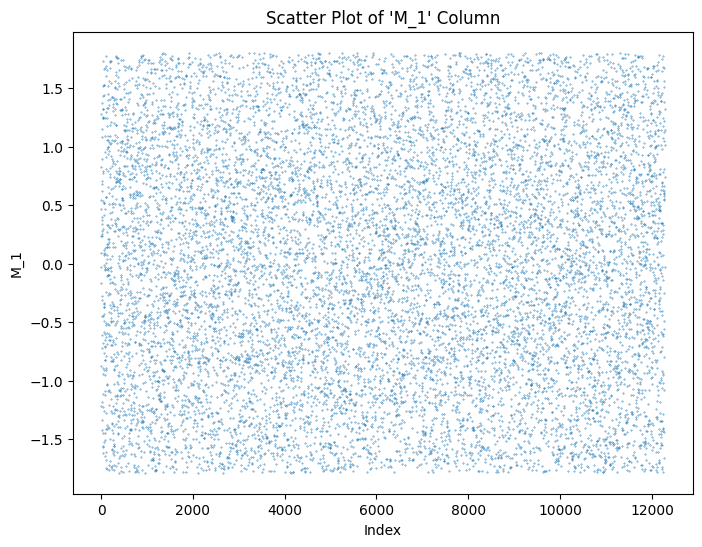

In [61]:
plot_scatter_from_df(normalised_df, "M_1")

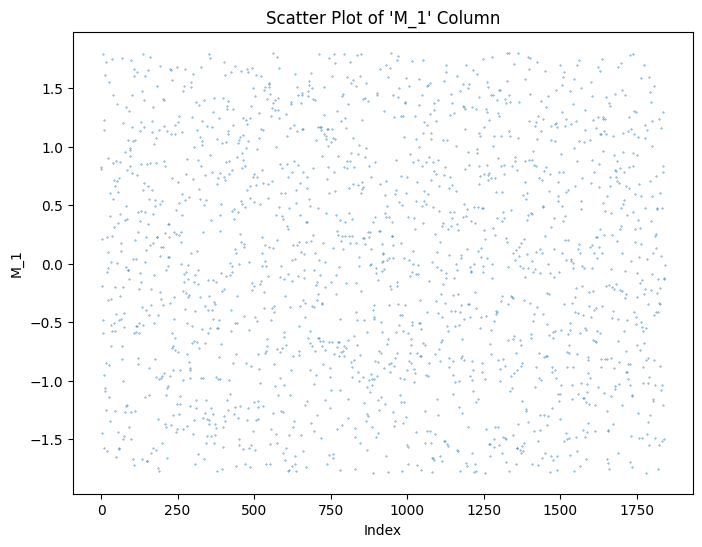

(1842, 13)

In [66]:
test = pd.read_csv("csv-files/EWKino_CLs_test.csv")
plot_scatter_from_df(test, "M_1")
test.shape

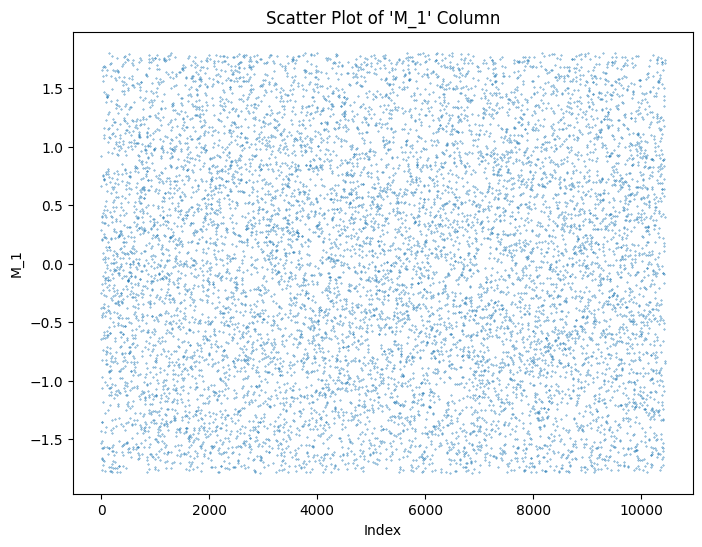

(10438, 13)

In [65]:
train = pd.read_csv("csv-files/EWKino_CLs_train.csv")
plot_scatter_from_df(train, "M_1")
train.shape